# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [52]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

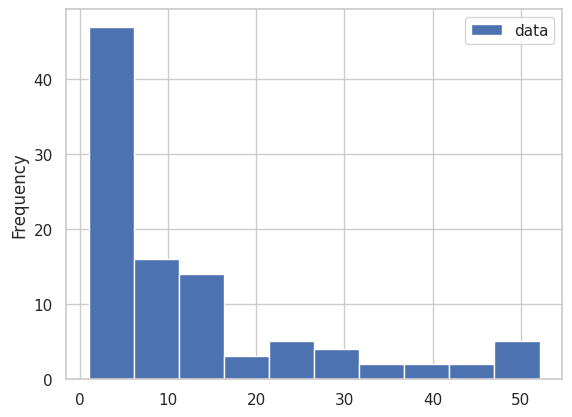

In [53]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

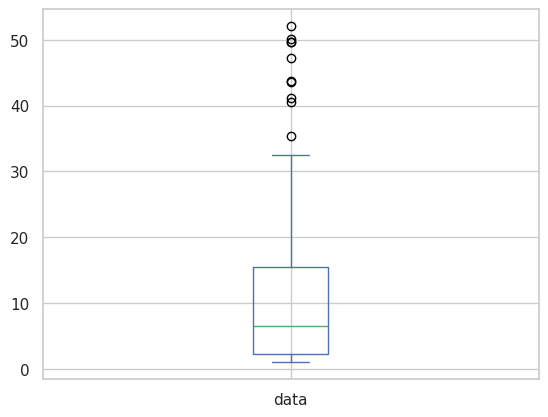

In [54]:
df.plot.box()

### Histogram vs. Boxplot: Pros and Cons

**Histogram**  
- **Pros:**  
  - Shows the distribution of drug prices across different ranges.  
  - Highlights the frequency of lower and higher-priced drugs, making it easier to spot skewness.  
- **Cons:**  
  - Less effective in showing outliers.  
  - Can be misleading if bin sizes aren’t chosen carefully.

**Boxplot**  
- **Pros:**  
  - Clearly identifies outliers, which is helpful when focusing on the more expensive drugs.  
  - Summarizes key statistics like median, quartiles, and data spread in a compact view.  
- **Cons:**  
  - Doesn’t show frequency distribution.  
  - Can be less intuitive for those unfamiliar with boxplots.

**Which to Choose?**  
For identifying how much the more expensive drugs cost in relation to others, the **boxplot** is more effective due to its focus on outliers and data spread.  

**Improvement Suggestions:**  
- **Histogram:** Use color gradients or adjust bin sizes to highlight higher price ranges.  
- **Boxplot:** Add color or annotations to highlight key stats and make it more visually engaging.


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [55]:
# 1) First, let's access the dataset

# Import required libraries
import kagglehub
import pandas as pd
import os

# Download the Austin Housing Prices dataset
path = kagglehub.dataset_download("ericpierce/austinhousingprices")

print("Path to dataset files:", path)

# Adjust the filename if needed based on the downloaded files
csv_file = os.path.join(path, "austinHousingData.csv")

# Load the dataset into a DataFrame
df = pd.read_csv(csv_file)

# Display the first few rows
df.head()


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/ericpierce/austinhousingprices/versions/4


,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,...,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,...,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,...,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,...,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,...,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg


In [56]:
# 2) Let's gather some more information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

In [57]:
# 3) Clean the dataset

# A. Drop Irrelevant Columns
df_clean = df.drop(columns=['zpid', 'description', 'homeImage', 'latestPriceSource'])

# B. Convert 'latest_saledate' to datetime
df_clean['latest_saledate'] = pd.to_datetime(df_clean['latest_saledate'], errors='coerce')

# C. Replace 0s in critical columns (which can't be 0) with NaN
cols_with_zero_invalid = ['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt', 'lotSizeSqFt']
df_clean[cols_with_zero_invalid] = df_clean[cols_with_zero_invalid].replace(0, pd.NA)

# D. Handle Missing Data (drop or impute)
df_clean.dropna(subset=['numOfBathrooms', 'numOfBedrooms', 'livingAreaSqFt'], inplace=True)

# E. Feature Engineering
df_clean['houseAge'] = 2025 - df_clean['yearBuilt']
df_clean['pricePerSqFt'] = df_clean['latestPrice'] / df_clean['livingAreaSqFt']

# F. Outlier Detection: Remove extreme price per sqft outliers
df_clean = df_clean[df_clean['pricePerSqFt'] < df_clean['pricePerSqFt'].quantile(0.99)]

# G. Final Check
df_clean.info()
df_clean.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14883 entries, 0 to 15170
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   city                        14883 non-null  object        
 1   streetAddress               14883 non-null  object        
 2   zipcode                     14883 non-null  int64         
 3   latitude                    14883 non-null  float64       
 4   longitude                   14883 non-null  float64       
 5   propertyTaxRate             14883 non-null  float64       
 6   garageSpaces                14883 non-null  int64         
 7   hasAssociation              14883 non-null  bool          
 8   hasCooling                  14883 non-null  bool          
 9   hasGarage                   14883 non-null  bool          
 10  hasHeating                  14883 non-null  bool          
 11  hasSpa                      14883 non-null  bool          


,city,streetAddress,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,houseAge,pricePerSqFt
0,pflugerville,14424 Lake Victor Dr,78660,30.430632,-97.663078,1.98,2,True,True,True,...,1,1.266667,2.666667,1063,14,3.0,4,2,13,117.262591
1,pflugerville,1104 Strickling Dr,78660,30.432673,-97.661697,1.98,2,True,True,True,...,1,1.400000,2.666667,1063,14,2.0,4,1,12,166.855204
2,pflugerville,1408 Fort Dessau Rd,78660,30.409748,-97.639771,1.98,0,True,True,False,...,1,1.200000,3.000000,1108,14,2.0,3,1,7,173.291610
3,pflugerville,1025 Strickling Dr,78660,30.432112,-97.661659,1.98,2,True,True,True,...,1,1.400000,2.666667,1063,14,2.0,3,1,12,143.027414
4,pflugerville,15005 Donna Jane Loop,78660,30.437368,-97.656860,1.98,0,True,True,False,...,1,1.133333,4.000000,1223,14,3.0,3,2,23,112.523452


In [58]:
# 4) Checking for duplicate rows

# Check for duplicate rows
duplicates = df_clean.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Remove duplicates if any
df_clean = df_clean.drop_duplicates()

# Confirm removal
print(f"New dataset shape: {df_clean.shape}")

Number of duplicate rows: 0
New dataset shape: (14883, 45)


In [59]:
# 5) Validate Categorical Values

# Check unique values for 'homeType' and 'city'
print("Home Types:", df_clean['homeType'].unique())
print("Cities:", df_clean['city'].unique())

Home Types: ['Single Family' 'Residential' 'Mobile / Manufactured' 'Townhouse' 'Condo'
 'Multiple Occupancy' 'Vacant Land' 'Other' 'Apartment' 'MultiFamily']
Cities: ['pflugerville' 'del valle' 'austin' 'driftwood' 'manor'
 'dripping springs' 'manchaca' 'west lake hills' 'road']


In [60]:
# 6) Investigate rows where the city the property is located in is called "road". This is probably an error.

df_clean[df_clean['city'] == 'road']

,city,streetAddress,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,...,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,houseAge,pricePerSqFt
7191,road,725 Sly Pass,78748,30.158154,-97.813858,1.98,0,False,False,False,...,1,0.933333,3.333333,1424,14,5.0,4,2,32,116.886286


In [61]:
# 7) Since there is just one property located in "road", we can remove the row.

# Drop the row where city is 'road'
df_clean = df_clean[df_clean['city'] != 'road']

# Verify the row has been removed
print(f"New dataset shape: {df_clean.shape}")
print("Unique cities after removal:", df_clean['city'].unique())

New dataset shape: (14882, 45)
Unique cities after removal: ['pflugerville' 'del valle' 'austin' 'driftwood' 'manor'
 'dripping springs' 'manchaca' 'west lake hills']


In [62]:
# Remove outliers as they will effect the visualizations

# Copy the DataFrame to avoid altering the original
df_cleaned = df_clean.copy()

# List of columns to clean
columns_to_clean = ['latestPrice', 'lotSizeSqFt', 'livingAreaSqFt']

# Remove Extreme Outliers using IQR
for col in columns_to_clean:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows outside the IQR range
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]


# Verify the changes
print("Data cleaned successfully. New shape:", df_cleaned.shape)
df_cleaned.describe()


Data cleaned successfully. New shape: (12641, 45)


,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfStories,houseAge,pricePerSqFt
count,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641,...,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,78737.004667,30.290117,-97.770166,1.995097,1.136935,1.133455,1988.119057,408196.848271,2.951744,2019-08-04 06:40:52.021200896,...,0.036073,1.018907,0.999842,1.749933,5.576562,1225.748359,14.726525,1.431532,36.880943,221.866706
min,78617.000000,30.129505,-98.005424,1.980000,0.000000,0.000000,1907.000000,6000.000000,1.000000,2018-01-22 00:00:00,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,1.000000,5.000000,2.047576
25%,78727.000000,30.199512,-97.828613,1.980000,0.000000,0.000000,1974.000000,295000.000000,1.000000,2018-11-01 00:00:00,...,0.000000,1.000000,1.000000,1.100000,4.000000,936.000000,14.000000,1.000000,19.000000,159.356073
50%,78744.000000,30.278851,-97.762466,1.980000,1.000000,1.000000,1992.000000,380000.000000,2.000000,2019-07-31 00:00:00,...,0.000000,1.000000,1.000000,1.500000,5.333333,1237.000000,15.000000,1.000000,33.000000,199.035370
75%,78749.000000,30.369707,-97.709412,1.980000,2.000000,2.000000,2006.000000,494700.000000,4.000000,2020-05-22 00:00:00,...,0.000000,1.000000,1.000000,2.166667,7.000000,1494.000000,16.000000,2.000000,51.000000,264.324324
max,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,959000.000000,22.000000,2021-01-30 00:00:00,...,2.000000,3.000000,2.000000,7.666667,9.500000,1913.000000,19.000000,4.000000,118.000000,648.298217
std,18.845896,0.099559,0.082806,0.055514,1.243272,1.243587,21.270039,161168.009525,2.407310,NaN,...,0.211525,0.200963,0.267430,0.933473,1.843897,331.568491,1.766325,0.511806,21.270039,91.380394


### Now I start with the analysis:

1. Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

2. Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

3. Draw a bar plot to indicate total counts of each categorical variable in a given column.

4. Find means, medians, and modes.

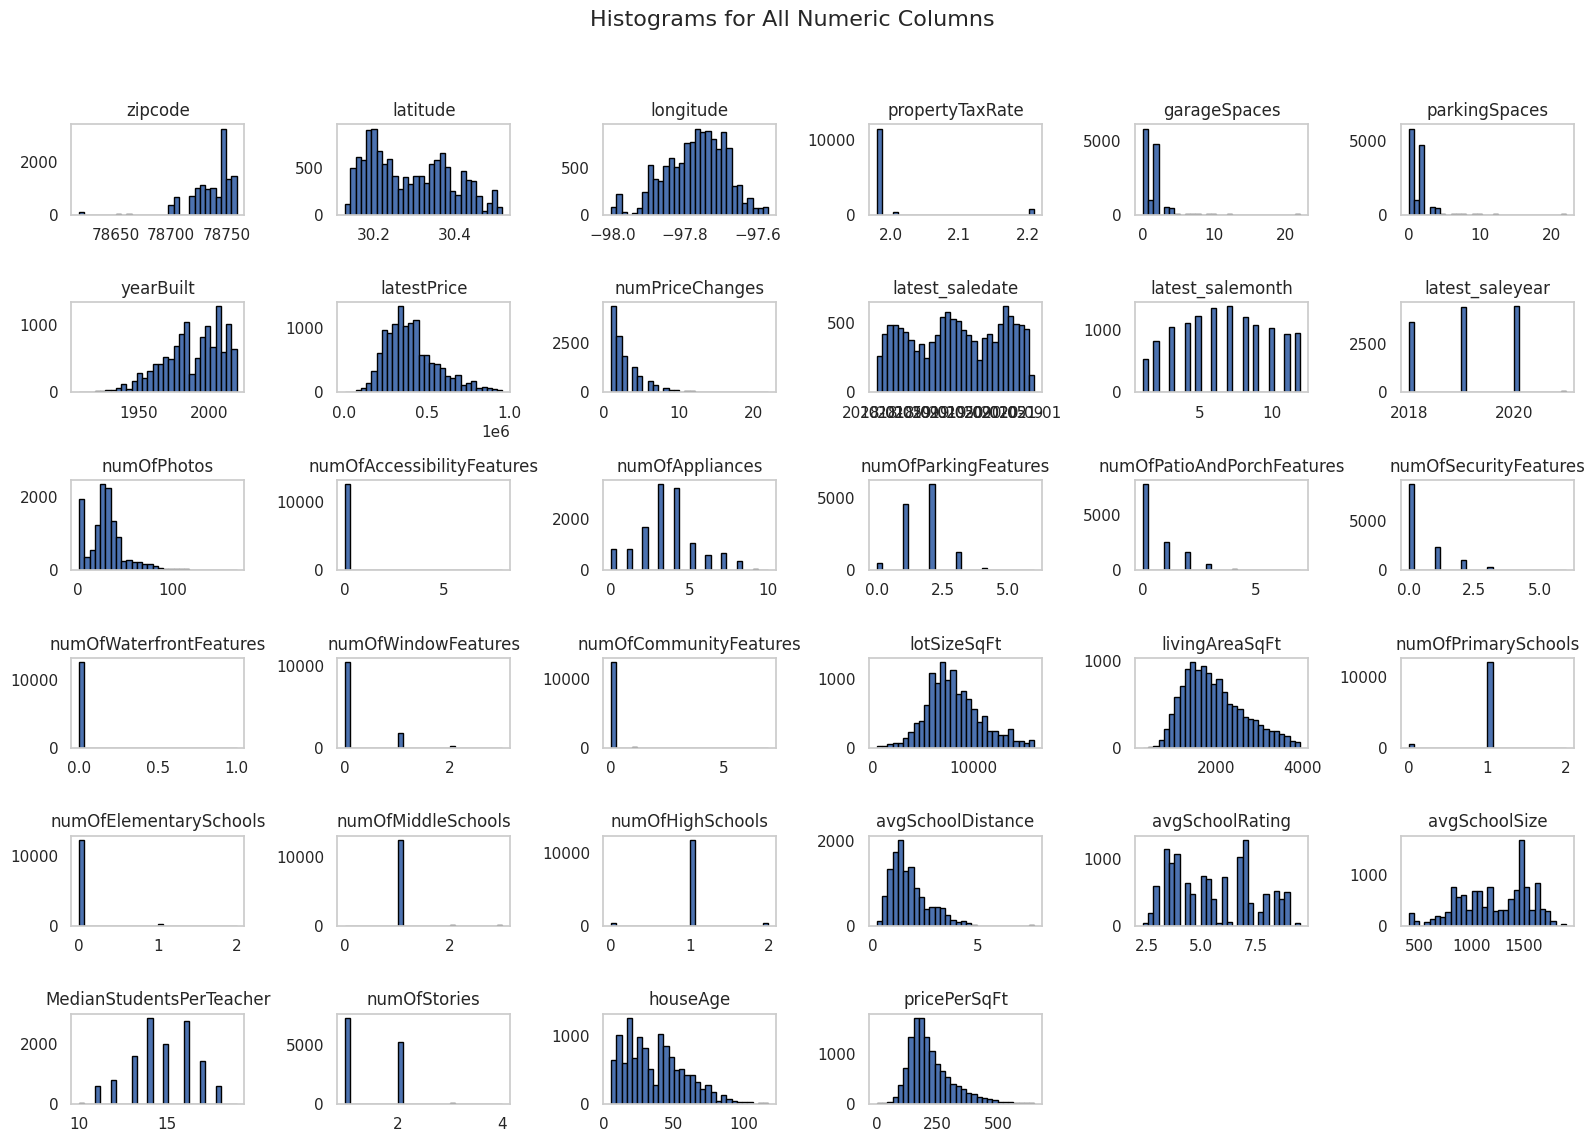

In [63]:
# 1.1) Histograms and histogram variants

import matplotlib.pyplot as plt

# Quick histograms for all numeric columns
df_cleaned.hist(figsize=(16, 12), bins=30, edgecolor='black', grid=False)
plt.suptitle('Histograms for All Numeric Columns', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


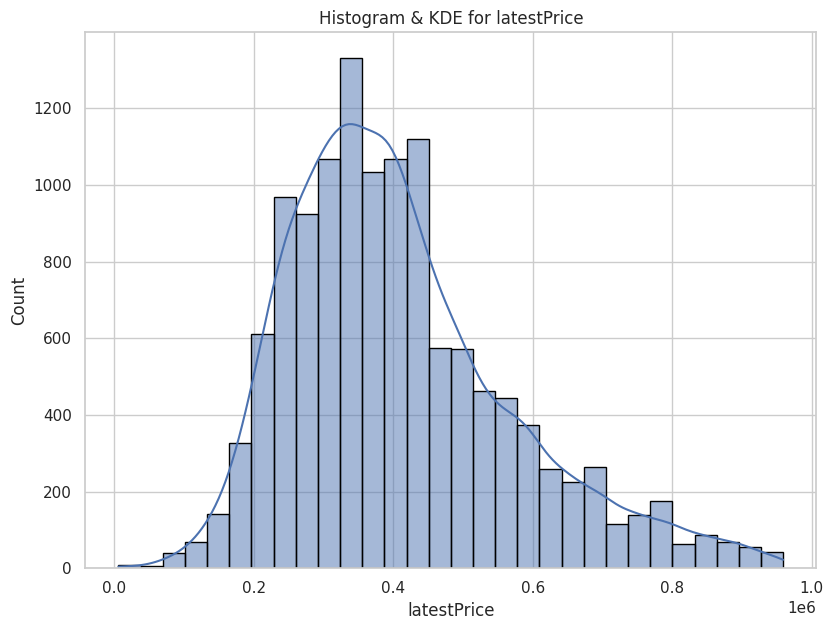

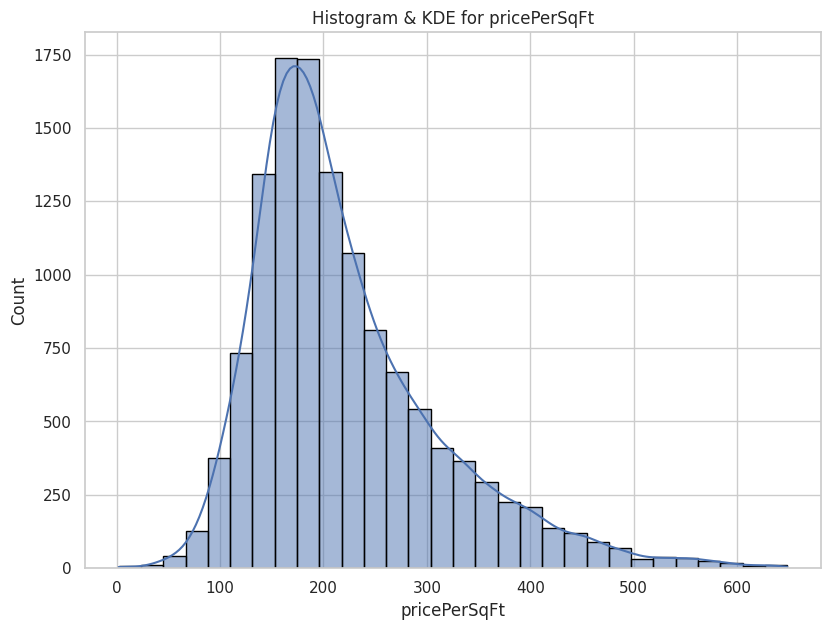

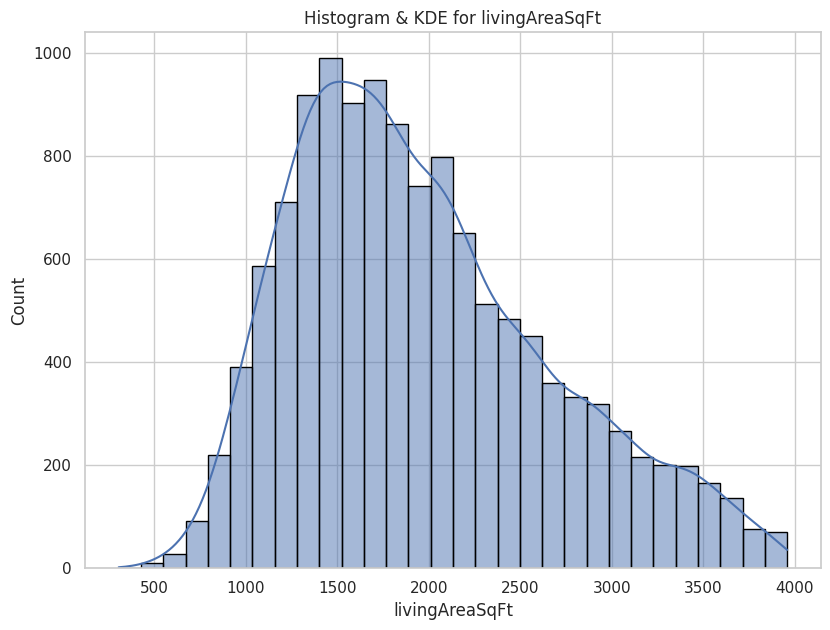

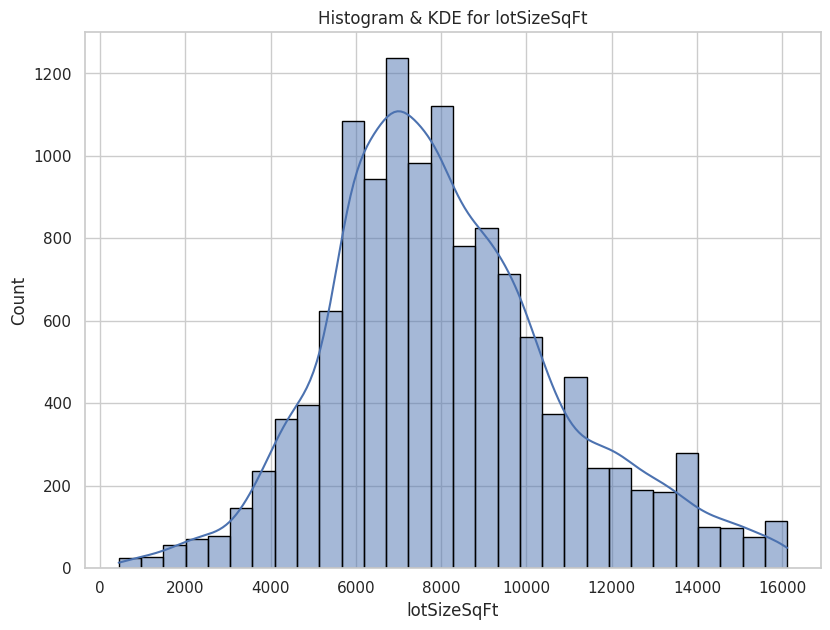

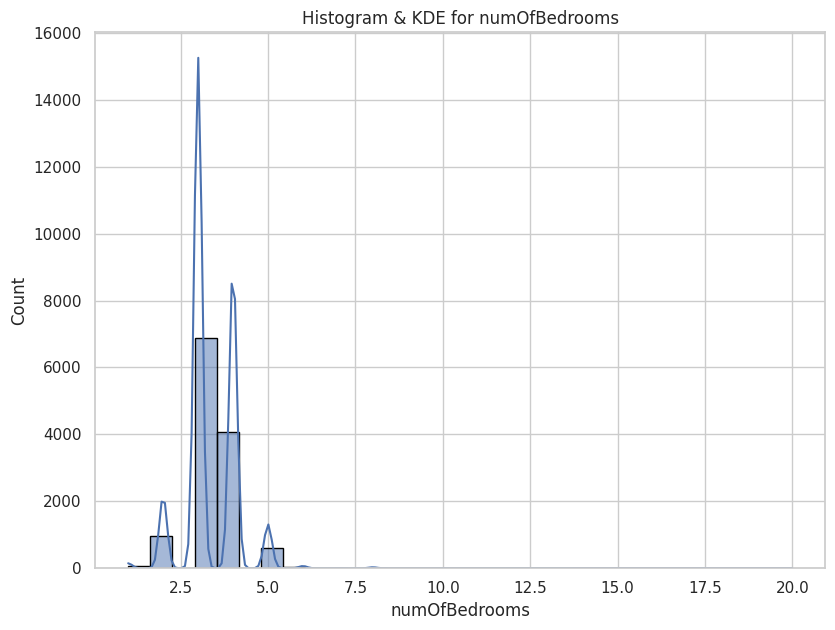

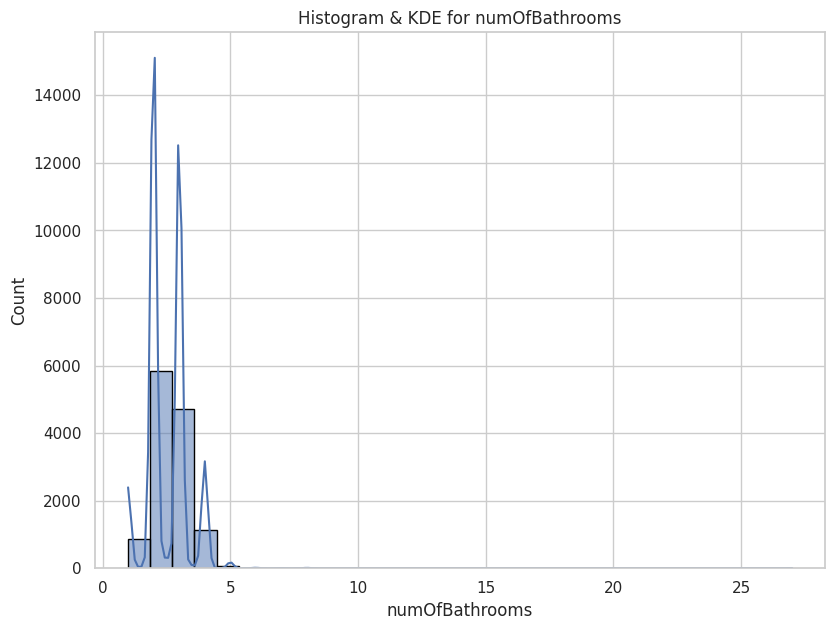

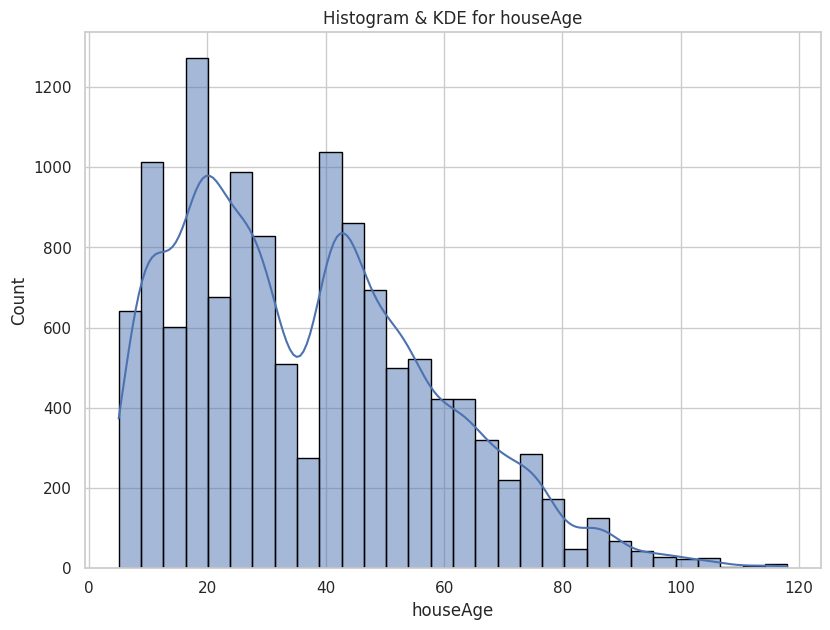

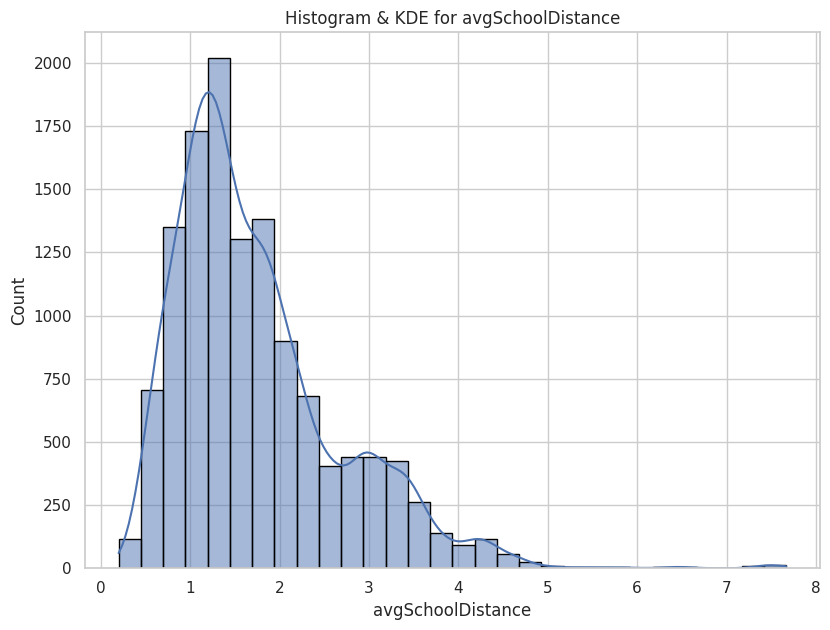

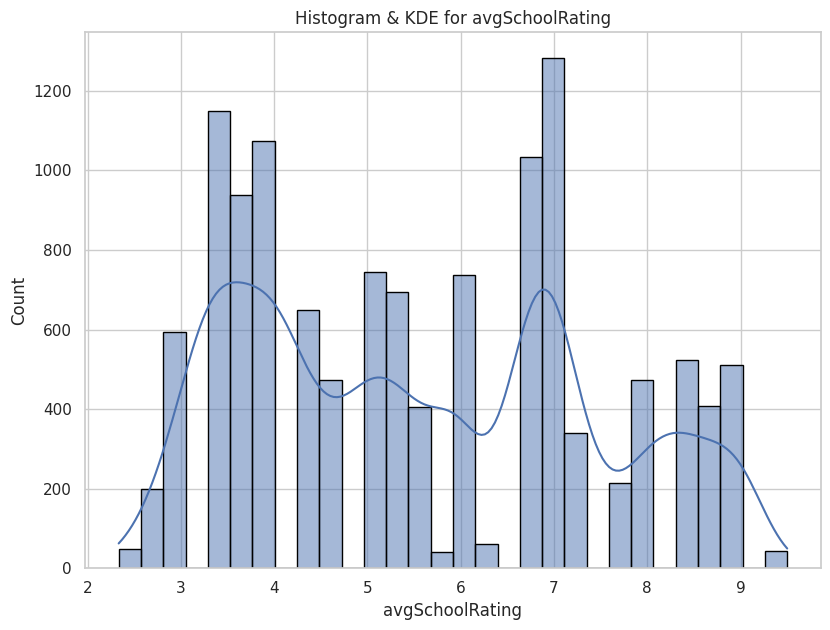

In [64]:
# 1.2) Histograms and Histogram Variants
import seaborn as sns

# Relevant columns for visualization
relevant_columns = ['latestPrice', 'pricePerSqFt', 'livingAreaSqFt', 'lotSizeSqFt',
                    'numOfBedrooms', 'numOfBathrooms', 'houseAge', 
                    'avgSchoolDistance', 'avgSchoolRating']

# Set plot style
sns.set(style="whitegrid")

# Iterate through selected columns
for col in relevant_columns:
    plt.figure(figsize=(16, 12))
    
    # ---------------------------- #
    # Histogram with KDE (Enabled) #
    # ---------------------------- #
    plt.subplot(2, 2, 1)
    sns.histplot(df_cleaned[col], bins=30, kde=True, edgecolor='black')
    plt.title(f'Histogram & KDE for {col}')
    
    # ------------------------------------- #
    # Violin Plot (Commented out for speed) #
    # ------------------------------------- #
    # plt.subplot(2, 2, 2)
    # sns.violinplot(x=df_cleaned[col])
    # plt.title(f'Violin Plot for {col}')
    
    # ---------------------------------- #
    # KDE Plot Alone (Commented out)    #
    # ---------------------------------- #
    # plt.subplot(2, 2, 3)
    # sns.kdeplot(df_cleaned[col], shade=True)
    # plt.title(f'KDE Plot for {col}')
    
    # --------------------------------------------- #
    # Swarm Plot (Skipped for continuous features) #
    # --------------------------------------------- #
    # plt.subplot(2, 2, 4)
    # if df_cleaned[col].nunique() < 50:  # Avoid clutter for high-cardinality data
    #     sns.swarmplot(x=col, data=df_clean)
    #     plt.title(f'Swarm Plot for {col}')
    # else:
    #     plt.text(0.5, 0.5, 'Swarm Plot skipped (too many unique values).',
    #              horizontalalignment='center', verticalalignment='center', fontsize=12)
    #     plt.title(f'Swarm Plot for {col}')
    
    plt.tight_layout()
    plt.show()


In [65]:
# Check the largest lot sizes
df_clean[['lotSizeSqFt']].sort_values(by='lotSizeSqFt', ascending=False).head(10)


,lotSizeSqFt
14654,1.508483e+09
9244,3.415452e+07
11116,2.617956e+07
2340,8.712000e+06
4635,8.581320e+06
8071,5.967720e+06
3549,5.902380e+06
869,5.880600e+06
1703,2.988216e+06
1610,2.988216e+06


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.